# By Yifeng Luo

In [1]:
import time 
import torch
import numpy as np
from model import Bert
import utils
import train 
import warnings
warnings.filterwarnings('ignore')

We are Loading the dataset now....
Successfully split the data into Train, dev, test
Now into the next, Build iterator
Loading data cost:  0:00:03
Epoch [1/20
Iter:     0, Train Loss: 0.85, Train Acc:   0.5, Val Loss: 0.95, Val Acc:28.16%, Time:0:00:09 *
Iter:   100, Train Loss: 0.85, Train Acc:  0.62, Val Loss: 0.32, Val Acc:88.59%, Time:0:01:10 *
Iter:   200, Train Loss:0.053, Train Acc:   1.0, Val Loss: 0.26, Val Acc:90.53%, Time:0:02:10 *
Iter:   300, Train Loss: 0.31, Train Acc:  0.75, Val Loss: 0.24, Val Acc:89.81%, Time:0:03:11 *
Iter:   400, Train Loss: 0.12, Train Acc:  0.88, Val Loss: 0.24, Val Acc:90.29%, Time:0:04:12 *
Epoch [2/20
Iter:   500, Train Loss:0.095, Train Acc:   1.0, Val Loss: 0.25, Val Acc:90.05%, Time:0:05:11 
Iter:   600, Train Loss: 0.11, Train Acc:   1.0, Val Loss: 0.25, Val Acc:90.29%, Time:0:06:11 
Iter:   700, Train Loss: 0.12, Train Acc:  0.88, Val Loss: 0.24, Val Acc:91.75%, Time:0:07:11 
Iter:   800, Train Loss:0.047, Train Acc:   1.0, Val Loss: 0.24,

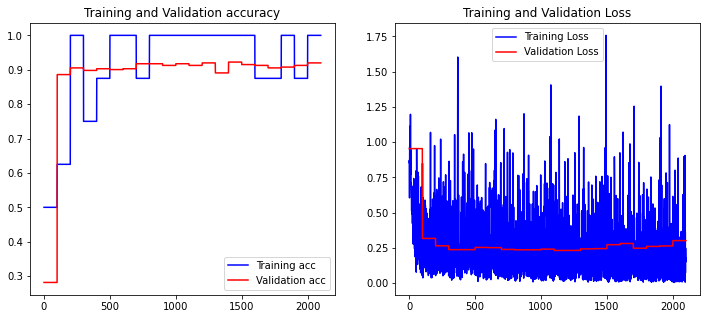

Test Loss: 0.23, Test Acc:92.74%
Precision, Recall and F1-Score
              precision    recall  f1-score   support

           0     0.9233    0.9837    0.9525       306
           1     0.9425    0.7664    0.8454       107

    accuracy                         0.9274       413
   macro avg     0.9329    0.8750    0.8989       413
weighted avg     0.9283    0.9274    0.9248       413

Confusion Maxtrix
[[301   5]
 [ 25  82]]
Using Time 0:00:07


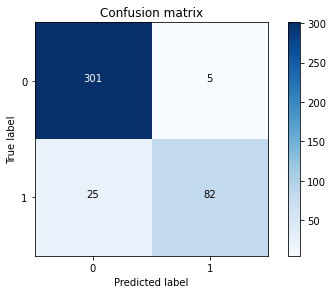

In [2]:
dataset = './data/'
config = Bert.Config(dataset)

# make sure the result is the same 
np.random.seed(1000)
torch.manual_seed(1000)
torch.cuda.manual_seed_all(4)
torch.backends.cudnn.deterministic = True

start_time = time.time()
print('We are Loading the dataset now....')
train_data, dev_data, test_data = utils.bulid_dataset(config)
print('Successfully split the data into Train, dev, test')
print('Now into the next, Build iterator')
train_iter = utils.bulid_iterator(train_data, config)
dev_iter = utils.bulid_iterator(dev_data, config)
test_iter = utils.bulid_iterator(test_data, config)

time_dif = utils.get_time_dif(start_time)
print('Loading data cost: ', time_dif)

# start training 
model = Bert.Model(config).to(config.device)
train.train(config, model, train_iter, dev_iter, test_iter)

**Only after 6 epochs the model can not improve**